* 分析OCO2-CHN和MappingXCO2-CHN的相关关系
* 和ODIAC的相关关系

In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

china = np.load("china_area.npy") > 0.0

In [3]:
ocoPath = "H:\\XCO2\\OCO2_L2_Lite_FP_11.1r\\CHN_year\\"
mapPath = "H:\\XCO2\\MappingXCO2\\MappingXCO2_china_50percent_year\\"

oco7years = np.array([np.load(ocoPath + f"MappingXCO2_{year}.npy") for year in range(2015, 2021)])
map7years = np.array([np.load(mapPath + f"MappingXCO2_{year}.npy") for year in range(2015, 2021)])

cut = np.expand_dims(china, axis=0).repeat(6, axis=0)
cut, cut.shape

(array([[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
 
        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
 
        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, 

In [12]:
ocoAno = oco7years[cut]
mapAno = map7years[cut]

mapAno = mapAno[~np.isnan(ocoAno)]
ocoAno = ocoAno[~np.isnan(ocoAno)]

In [13]:
np.isnan(ocoAno).sum(), np.isnan(mapAno).sum()

(0, 0)

In [14]:
r2_score(ocoAno, mapAno)

0.2256782259132779

In [19]:
df_ano = pd.DataFrame([ocoAno, mapAno], index=["OCO2_ano", "Mapping_ano"]).T
df_ano

,OCO2_ano,Mapping_ano
0,1.514215,0.089652
1,-0.086438,0.174029
2,0.126966,0.062742
3,-0.061199,-0.182071
4,0.200832,0.146836
...,...,...
5757,0.389069,-0.303795
5758,-1.171377,-0.449001
5759,-0.709410,-0.733810
5760,-0.902037,-0.282507


In [20]:
df_ano.corr()

,OCO2_ano,Mapping_ano
OCO2_ano,1.000000,0.534466
Mapping_ano,0.534466,1.000000


In [35]:
df_ano.corr().iloc[0, 1]

0.534466279605614

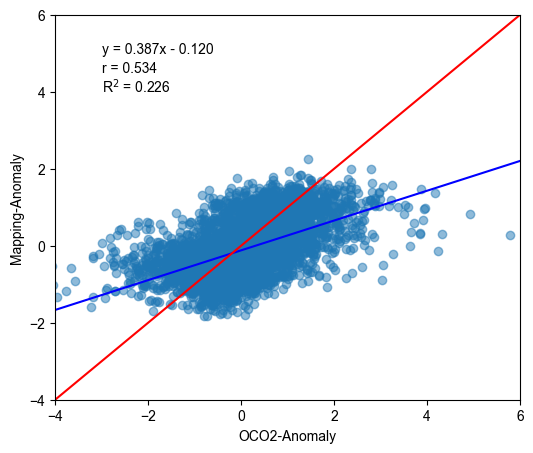

In [34]:
p = curve_fit(lambda x, k, b: k*x + b, ocoAno, mapAno)[0]

plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(6, 5))
plt.scatter(ocoAno, mapAno, alpha=0.5)
plt.plot(np.linspace(-4, 6, 3), p[0] * np.linspace(-4, 6, 3) + p[1], color="blue")
plt.plot(np.linspace(-4, 6, 3), np.linspace(-4, 6, 3), color="red")
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.xlabel("OCO2-Anomaly")
plt.ylabel("Mapping-Anomaly")
plt.annotate(r"y = {:.3f}x - {:.3f}".format(p[0], -p[1]), xy=(-3.0, 5.0))
plt.annotate(f"r = 0.534", xy=(-3.0, 4.5))
plt.annotate(f"R$^2$ = 0.226", xy=(-3.0, 4.0))
plt.show()

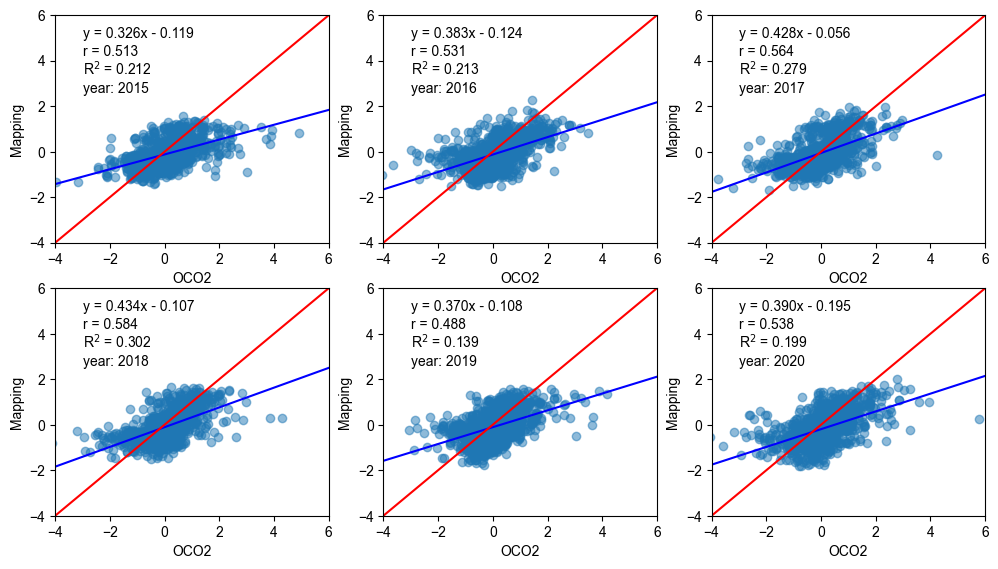

In [40]:
plt.figure(figsize=(12, 6.5))
sub = 231
for year in range(2015, 2021):
    OCO_npy = np.load(ocoPath + f"MappingXCO2_{year}.npy")
    MAP_npy = np.load(mapPath + f"MappingXCO2_{year}.npy")
    OCO = OCO_npy[china]
    MAP = MAP_npy[china]
    map_ano = MAP[~np.isnan(OCO)]
    oco_ano = OCO[~np.isnan(OCO)]
    
    r2 = r2_score(oco_ano, map_ano)
    r = pd.DataFrame([oco_ano, map_ano], index=["OCO2_ano", "Mapping_ano"]).T.corr().iloc[0, 1]

    p = curve_fit(lambda x, k, b: k*x + b, oco_ano, map_ano)[0]
    
    plt.subplot(sub)
    plt.scatter(oco_ano, map_ano, alpha=0.5)
    plt.plot(np.linspace(-4, 6, 3), p[0] * np.linspace(-4, 6, 3) + p[1], color="blue")
    plt.plot(np.linspace(-4, 6, 3), np.linspace(-4, 6, 3), color="red")
    plt.xlim(-4, 6)
    plt.ylim(-4, 6)
    plt.xlabel("OCO2")
    plt.ylabel("Mapping")
    if p[1] < 0:
        plt.annotate(r"y = {:.3f}x - {:.3f}".format(p[0], -p[1]), xy=(-3.0, 5.0))
    else:
        plt.annotate(r"y = {:.3f}x + {:.3f}".format(p[0], p[1]), xy=(-3.0, 5.0))
    plt.annotate(r"r = {:.3f}".format(r), xy=(-3.0, 4.2))
    plt.annotate(r"R$^2$ = {:.3f}".format(r2), xy=(-3.0, 3.4))
    plt.annotate(f"year: {year}", xy=(-3.0, 2.6))
    
    sub += 1
    
plt.show()

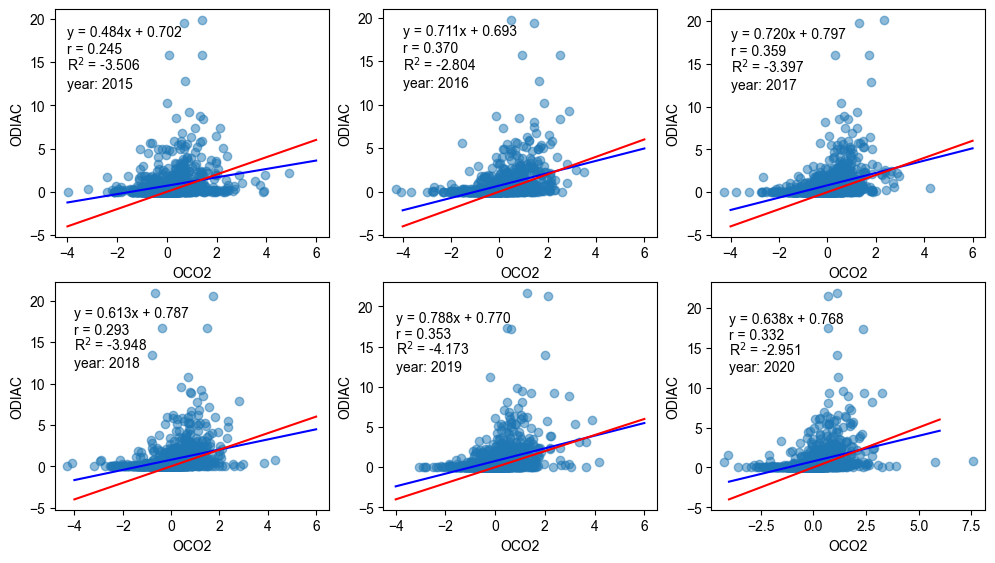

In [46]:
odiacPath = "H:\\CO2\\ODIAC\\2022\\year\\"

plt.figure(figsize=(12, 6.5))
sub = 231
for year in range(2015, 2021):
    OCO_npy = np.load(ocoPath + f"MappingXCO2_{year}.npy")
    MAP_npy = np.load(odiacPath + f"ODIAC_{year}.npy")
    OCO = OCO_npy[china]
    MAP = MAP_npy[china]
    map_ano = MAP[~np.isnan(OCO)]
    oco_ano = OCO[~np.isnan(OCO)]

    # oco_ano = oco_ano[map_ano > 0.1]
    # map_ano = map_ano[map_ano > 0.1]

    r2 = r2_score(oco_ano, map_ano)
    r = pd.DataFrame([oco_ano, map_ano], index=["OCO2_ano", "Mapping_ano"]).T.corr().iloc[0, 1]

    p = curve_fit(lambda x, k, b: k*x + b, oco_ano, map_ano)[0]

    plt.subplot(sub)
    plt.scatter(oco_ano, map_ano, alpha=0.5)
    plt.plot(np.linspace(-4, 6, 3), p[0] * np.linspace(-4, 6, 3) + p[1], color="blue")
    plt.plot(np.linspace(-4, 6, 3), np.linspace(-4, 6, 3), color="red")
    # plt.xlim(-4, 6)
    # plt.ylim(-4, 6)
    plt.xlabel("OCO2")
    plt.ylabel("ODIAC")
    if p[1] < 0:
        plt.annotate(r"y = {:.3f}x - {:.3f}".format(p[0], -p[1]), xy=(-4.0, 18.0))
    else:
        plt.annotate(r"y = {:.3f}x + {:.3f}".format(p[0], p[1]), xy=(-4.0, 18.0))
    plt.annotate(r"r = {:.3f}".format(r), xy=(-4.0, 16.0))
    plt.annotate(r"R$^2$ = {:.3f}".format(r2), xy=(-4.0, 14.0))
    plt.annotate(f"year: {year}", xy=(-4.0, 12.0))

    sub += 1

plt.show()